In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from google.colab import files

In [2]:
def clean(raw):
    raw.drop(labels=['Name', 'Ticket', 'Cabin'], axis='columns', inplace=True)
    
    raw['Age'] = raw['Age'].fillna(raw['Age'].mean())
    raw['Embarked'] = raw['Embarked'].fillna(raw['Embarked'].mode()[0])
    
    raw['Fare'] = raw['Fare'].map(lambda i: np.log(i) if i > 0 else 0)
    
    sex_dummy = pd.get_dummies(raw['Sex'])
    raw = pd.concat([raw, sex_dummy], axis=1)
    raw.drop('Sex', axis=1, inplace=True)

    embarked_dummy = pd.get_dummies(raw['Embarked'], prefix='Embarked')
    raw = pd.concat([raw, embarked_dummy], axis=1)
    raw.drop('Embarked', axis=1, inplace=True)

    pclass_dummy = pd.get_dummies(raw['Pclass'], prefix='Pclass')
    raw = pd.concat([raw, pclass_dummy], axis=1)
    raw.drop('Pclass', axis=1, inplace=True)
    
    raw.drop(
        labels=['Embarked_Q', 'SibSp', 'Age', 'Parch', 'Pclass_2'],
        axis='columns',inplace=True)
    
    return raw

In [14]:
x_train: pd.DataFrame = pd.read_csv('train.csv', index_col=0)
x_test: pd.DataFrame = pd.read_csv('test.csv', index_col=0)
y_train: pd.Series = x_train['Survived']
x_train.drop(labels=['Survived'], axis='columns', inplace=True)

x_train = clean(x_train)
x_test = clean(x_test)

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

params = {
    'hidden_layer_sizes': [(i,) for i in range(1, 15)],
}

base_mlp = MLPClassifier(random_state=3, max_iter=400)
mlp = GridSearchCV(
    base_mlp,
    params,
    scoring='balanced_accuracy',
    n_jobs=-1,
    cv=5,
    return_train_score=True,
)
mlp.fit(x_train, y_train)

results = pd.DataFrame(mlp.cv_results_)
results = results[['param_hidden_layer_sizes','mean_test_score',
                  'rank_test_score', 'mean_train_score']]
results.to_csv('mlp_results.csv', index=False)
files.download('mlp_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

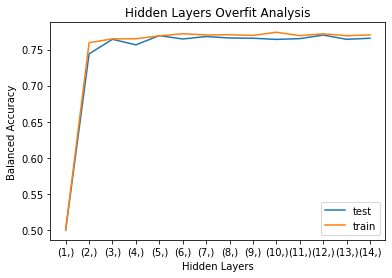

In [15]:
plt.plot(results['param_hidden_layer_sizes'].astype('str'), results['mean_test_score'], label='test')
plt.plot(results['param_hidden_layer_sizes'].astype('str'), results['mean_train_score'], label='train')

plt.xlabel('Hidden Layers')
plt.ylabel('Balanced Accuracy')
plt.title('Hidden Layers Overfit Analysis')
plt.legend()
plt.savefig('layers.svg', format='svg')
files.download('layers.svg')

In [20]:
mlp = MLPClassifier(hidden_layer_sizes=(12,),
                    max_iter=400,
                    random_state=3)
mlp.fit(x_train, y_train)
predictions = pd.DataFrame()
predictions['Survived'] = mlp.predict(x_test)
x_test: pd.DataFrame = pd.read_csv('test.csv', index_col=0)
predictions['PassengerId'] = x_test.index
predictions.to_csv('mlp_output.csv', index=False)
files.download('mlp_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
results

,param_hidden_layer_sizes,mean_test_score,rank_test_score,mean_train_score
0,"(1,)",0.500000,14,0.500000
1,"(2,)",0.744043,13,0.759459
2,"(3,)",0.764194,10,0.764809
3,"(4,)",0.756544,12,0.764916
4,"(5,)",0.769317,2,0.768998
5,"(6,)",0.764617,8,0.771900
6,"(7,)",0.768061,3,0.770232
7,"(8,)",0.766029,4,0.770559
8,"(9,)",0.765660,5,0.769601
9,"(10,)",0.764055,11,0.773988
